In [137]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

from datetime import datetime, timedelta

plt.style.use('ggplot')

In [138]:
# Путь до папки с данными
path_to_data = 'datasets/'

In [139]:
predict_period = ['2019-11-01', '2019-11-11'] 
f_day = datetime.strptime(predict_period[0], '%Y-%m-%d') 
l_day = datetime.strptime(predict_period[1], '%Y-%m-%d')
predict_ndays = (l_day - f_day).days

In [140]:
data = pd.read_pickle(path_to_data + 'processed_data/daily.pkl')

In [141]:
data = data.sort_values(by=['station_id','date'])
data = data.reset_index(drop=True)

In [142]:
# Выбираем целевые гидрологические посты
#station_ids = [5016, 5008, 5001, 6023]
#data = data[data['station_id']#.isin(station_ids)]

In [143]:
data['temp'].value_counts(dropna = False)

NaN      790928
0.00     185396
0.10      31939
0.20      24295
0.30      14512
          ...  
11.02         1
2.23          1
9.56          1
16.42         1
8.26          1
Name: temp, Length: 686, dtype: int64

In [144]:
data = data.set_index('date')
data.groupby('station_id').describe()
# daily.loc[daily['station_id'] ==5805, 'stage_max'].plot(figsize=(20, 5))
# daily = daily.reset_index()

stage_avg                                                      \
               count        mean         std    min    25%    50%    75%   
station_id                                                                 
5001         12405.0  280.409835  156.282432  -32.0  160.0  255.0  376.0   
5002         12412.0  441.431760  171.051353   95.0  310.0  417.0  548.0   
5004         12382.0  274.282345  181.839095  -59.0  127.0  236.0  387.0   
5008         11875.0   48.043284  144.378650 -252.0  -67.0   18.0  137.0   
5009         12353.0  550.956286  170.432560  285.0  399.0  531.0  673.0   
...              ...         ...         ...    ...    ...    ...    ...   
6563         12054.0   36.317405   19.069362  -16.0   25.0   36.0   49.0   
6564          3264.0  114.503676   64.796321  -26.0   64.0  119.0  155.0   
6568          9179.0   85.096307   25.409312   30.0   73.0   82.0   96.0   
6573           182.0  152.934066   17.400579  142.0  145.0  148.0  152.0   
6574          5425.0   43.619908   23.078535  -29.0   28.0   44.0   55.0   

                   stage_min              ...     temp        water_code  \
               max     count        mean  ...      75%    max      count   
station_id                                ...                              
5001        1132.0   12405.0  277.463603  ...  18.6000  26.65    11706.0   
5002        1202.0   12412.0  438.916613  ...  19.5000  27.10    11826.0   
5004        1044.0   12382.0  271.787837  ...  20.1000  27.40    11668.0   
5008         710.0   11875.0   46.466442  ...  20.5000  30.00    11224.0   
5009        1295.0   12353.0  549.130980  ...  19.8000  29.30    12028.0   
...            ...       ...         ...  ...      ...    ...        ...   
6563         212.0   12056.0   35.830956  ...   7.7000  29.00    12096.0   
6564         438.0    3264.0  111.738358  ...  11.7000  29.00     2968.0   
6568         268.0    9175.0   83.920545  ...  11.3000  17.40    12388.0   
6573         223.0     182.0  152.521978  ...  18.4375  22.80      273.0   
6574         144.0    5426.0   42.697567  ...   9.7000  29.00     5524.0   

                                                                   
                 mean        std   min    25%    50%   75%    max  
station_id                                                         
5001        27.759773   9.740731  1.00  23.00  29.00  29.0  47.00  
5002        27.978506  10.006745  2.00  23.00  29.00  29.0  47.00  
5004        26.964022   9.758096  1.00  16.00  29.00  29.0  47.00  
5008        28.283362   9.813097  0.00  23.00  29.00  29.3  47.00  
5009        26.947332   9.626868  1.00  16.00  29.00  29.3  48.29  
...               ...        ...   ...    ...    ...   ...    ...  
6563        22.262073   8.257609  2.00  15.00  29.00  29.0  47.00  
6564        22.715617   6.952939  1.29  17.33  24.15  29.0  47.18  
6568        23.805936   6.333803  1.00  19.00  29.00  29.0  51.00  
6573        25.878608   6.430820  2.00  19.00  29.00  31.0  31.00  
6574        23.120632   7.566683  2.00  18.00  29.00  29.0  47.18  

[198 rows x 40 columns]

In [145]:
data['station_id'].value_counts()

5740    12686
5319    12447
5321    12447
5331    12447
6030    12419
        ...  
6001      730
5395      518
6545      396
6573      273
5408       92
Name: station_id, Length: 198, dtype: int64

In [146]:
dg = data.groupby('station_id')

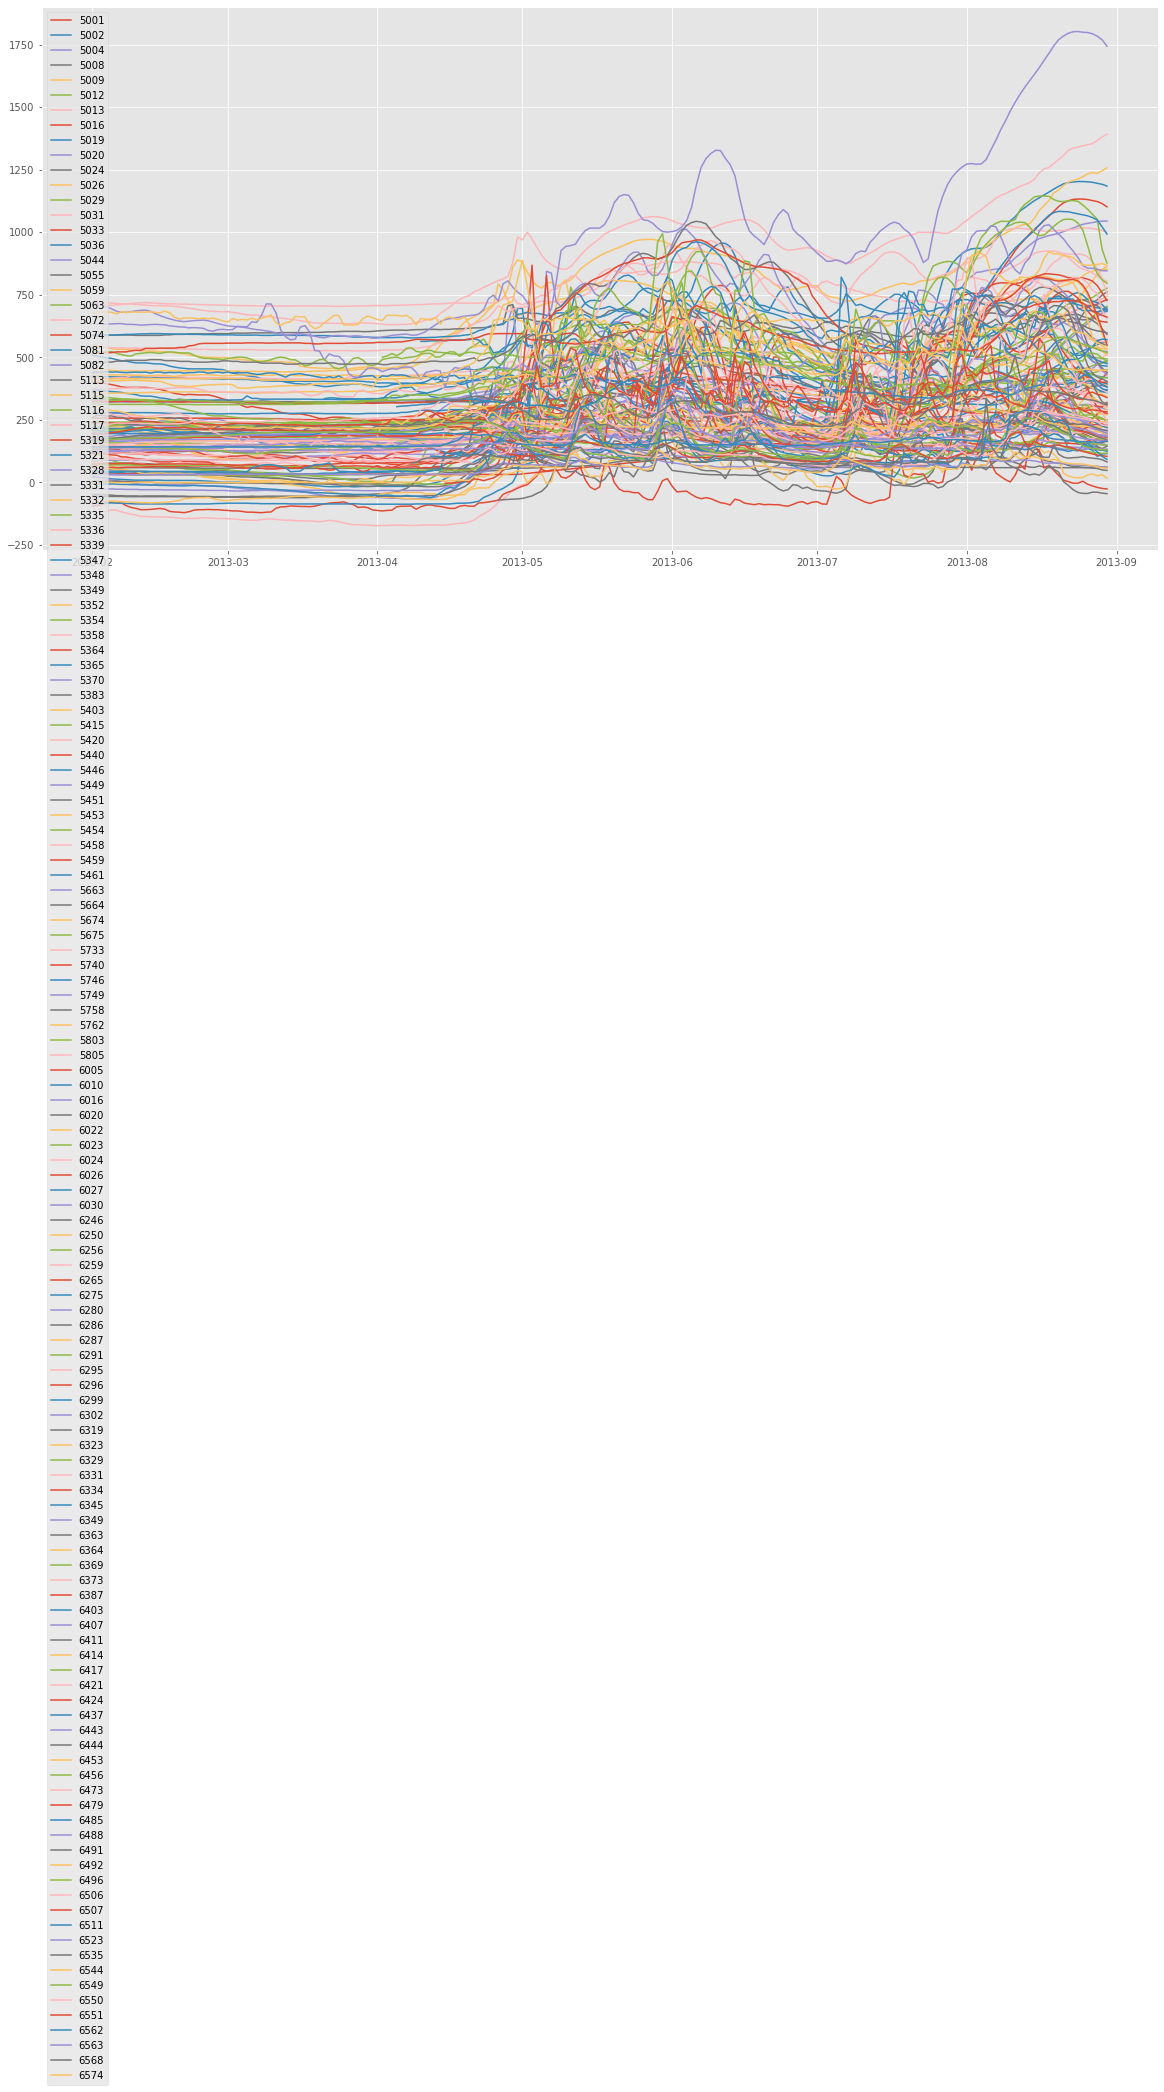

In [147]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))
data = data
#data = data['stage_max'] # use only Temp, Month, Day


# multiline plot with group by
for key, grp in data.loc['2013-02-01':'2013-08-30'].groupby(['station_id']): 
    ax.plot(grp.index, grp['stage_max'], label = key)
plt.legend(loc='best')    
plt.show()

In [148]:
plt.figure(figsize=(20,5))
leg = []
for st in nf.station_id.unique():
    sf = nf[nf['station_id'] == st]
    sf['stage_max'].plot()
    leg.append(st)
plt.legend(leg)

NameError: name 'nf' is not defined

<Figure size 1440x360 with 0 Axes>

In [ ]:
stations = pd.read_pickle(path_to_data + 'processed_data/station_coords.pkl')
stations

In [63]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

NameError: name 'test' is not defined